## 2023-10-23 Meeting Plots

Meeting with Carlos. want to analyze the performance of animals that have been on the sb only rule.

In [2]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-10-25 11:16:55,964][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-10-25 11:16:56,461][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [3]:
sb_animals = ["R010", "R013", "C220", "C222"]
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)

trials_df = create_trials_df_from_dj(
    animal_ids=sb_animals, date_min=date_min, date_max=date_max
)

fetched 18 sessions for R010 between 2023-10-07 and 2023-10-24
fetched 18 sessions for R013 between 2023-10-07 and 2023-10-24
fetched 18 sessions for C220 between 2023-10-07 and 2023-10-24
fetched 18 sessions for C222 between 2023-10-07 and 2023-10-24


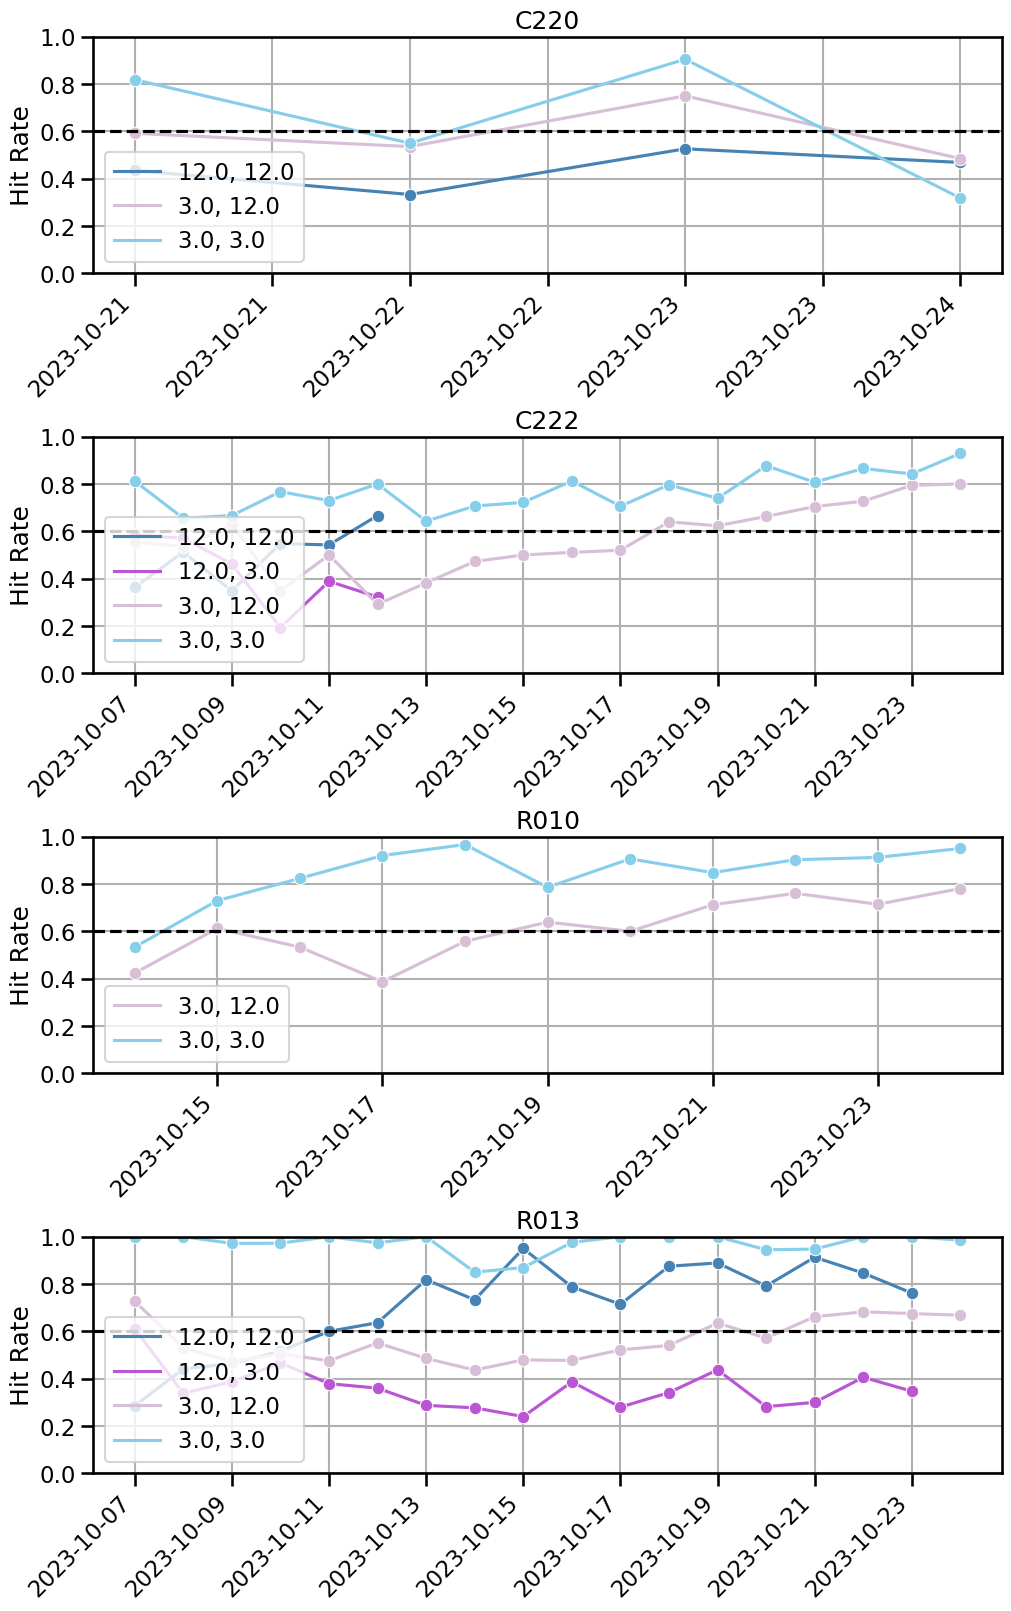

In [5]:
n_animals = len(sb_animals)
fig, ax = plt.subplots(
    n_animals, 1, figsize=(10, 4 * n_animals), sharey=True, constrained_layout=True
)
for ii, (animal_id, sub_df) in enumerate(trials_df.groupby("animal_id")):
    plot_non_give_stim_performance(
        sub_df,
        ax[ii],
        title=animal_id,
        xaxis_label=True,
    )

Note: to make this plot I had to comment out the x_axis label call

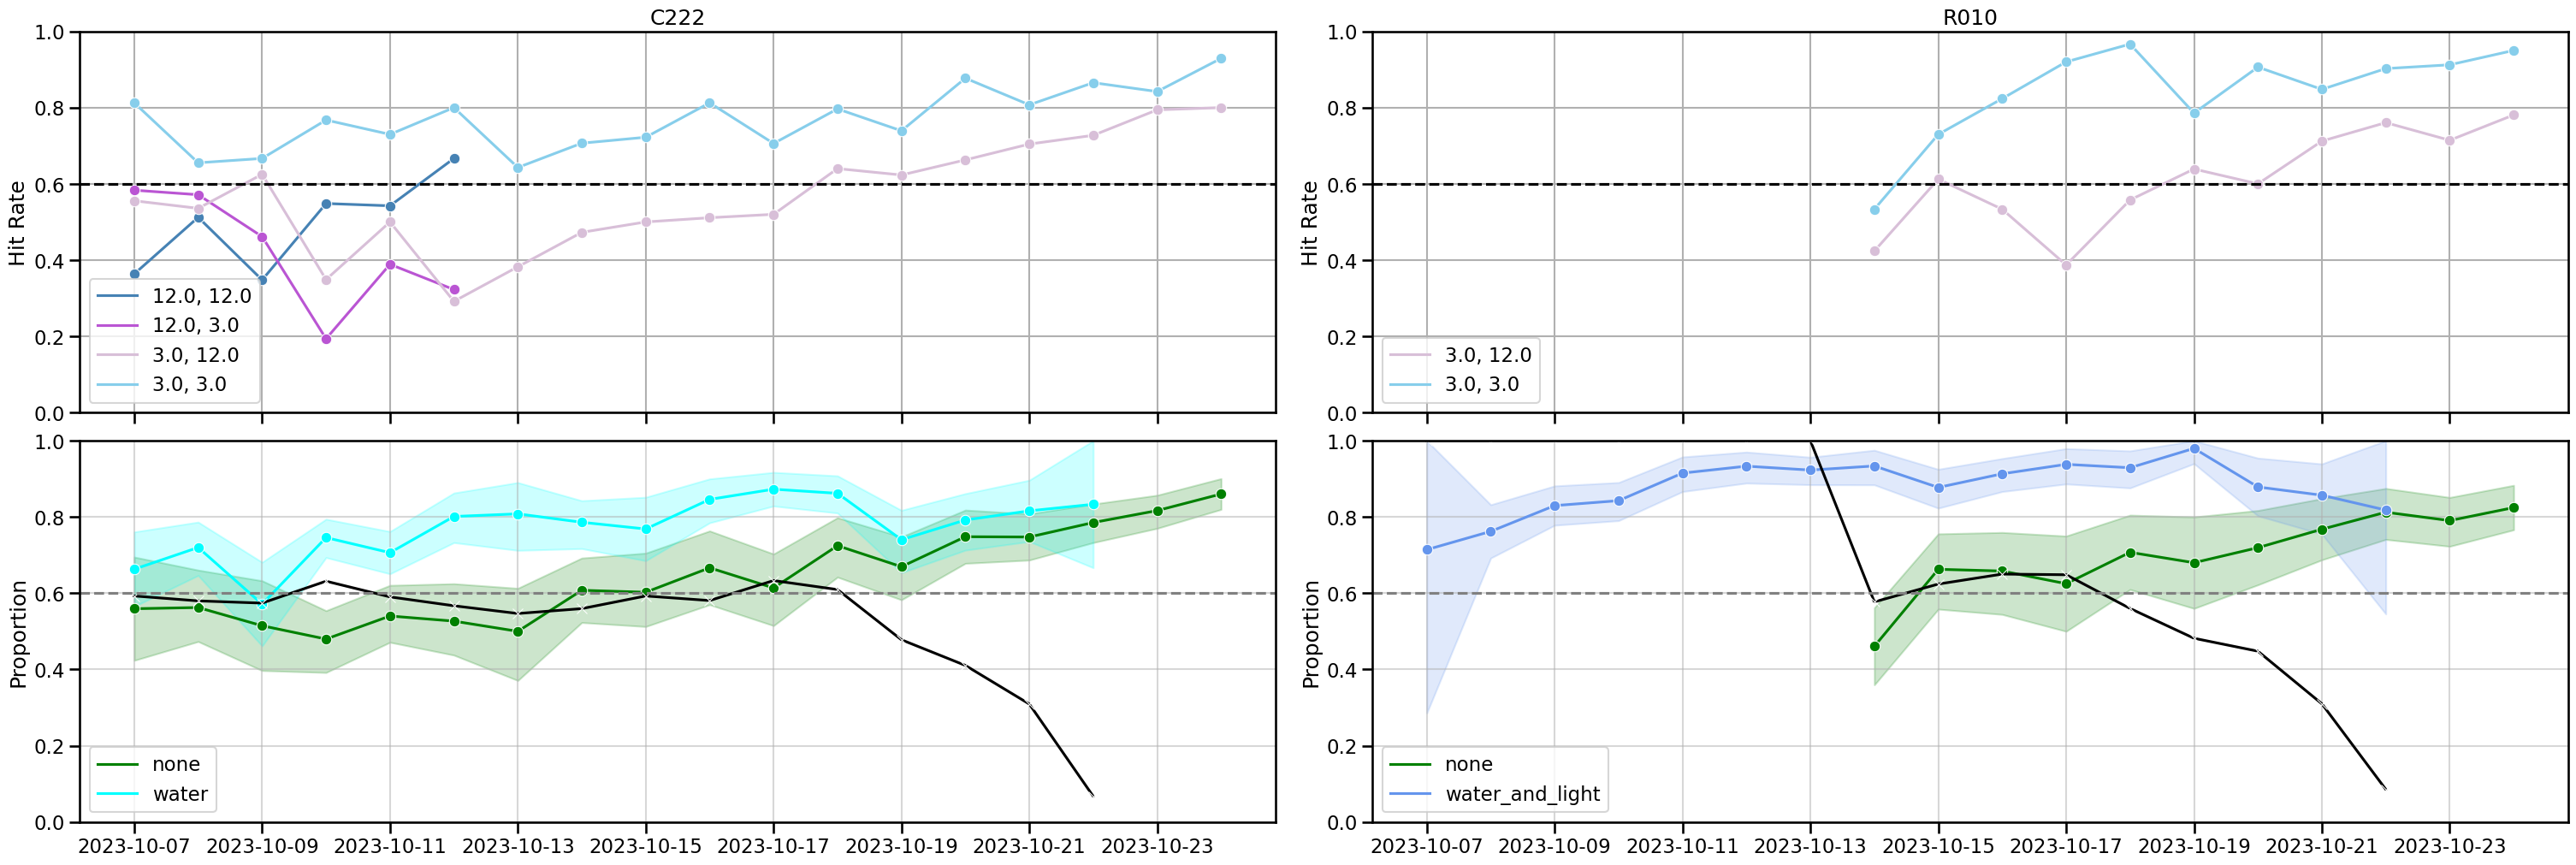

In [26]:
animals_of_interest = ["R010", "C222"]

aoi_df = trials_df.query("animal_id in @animals_of_interest")

fig, ax = plt.subplots(
    2, 2, figsize=(30, 10), sharey=False, sharex=True, constrained_layout=True
)

for ii, (animal_id, sub_df) in enumerate(aoi_df.groupby("animal_id")):
    plot_non_give_stim_performance(
        sub_df,
        ax[0, ii],
        title=animal_id,
        xaxis_label=True,
    )

    plot_performance_by_give(
        sub_df,
        ax[1, ii],
        xaxis_label=True,
    )

In [33]:
trials_df.date.min()

datetime.date(2023, 10, 7)

In [38]:
date = pd.Timestamp("2023-10-15")
date.date()

datetime.date(2023, 10, 15)

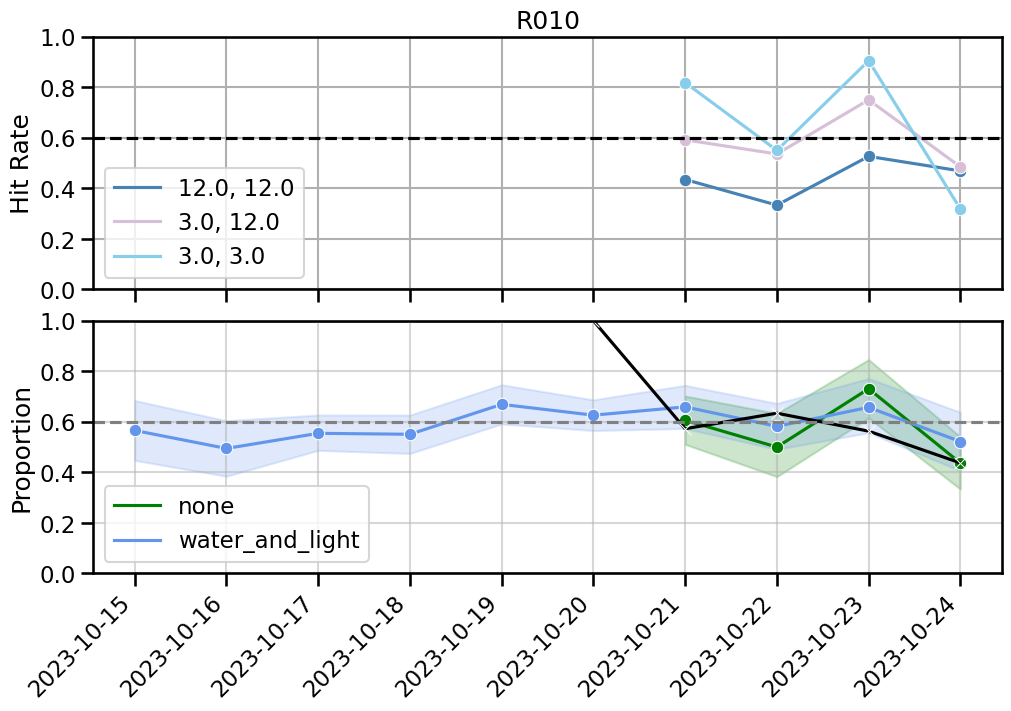

In [40]:
date = pd.Timestamp("2023-10-15").date()
sub_df = trials_df.query("animal_id == 'C220' and date >= @date")

fig, ax = plt.subplots(
    2, 1, figsize=(10, 7), sharey=False, sharex=True, constrained_layout=True
)

plot_non_give_stim_performance(
    sub_df,
    ax[0],
    title=animal_id,
    xaxis_label=True,
)

plot_performance_by_give(
    sub_df,
    ax[1],
    xaxis_label=True,
)